# Project Introduction: Private Jets pollution analysis

>" A private jet flight causes about 10 times more CO2 emissions than a regular flight per flight per person, and 50 times more than the average train ride.  
> [...] In just one hour, a single private jet can emit two tonnes of CO2. The global average energy-related carbon footprint is around 4.7 tonnes of CO2 per person per year. " [(greenpeace.org)](https://www.greenpeace.org/international/act/ban-private-jets/)

In an era where environmental awareness and concern for climate change are increasingly urgent, analyzing emissions from industries related to air travel, such as private jets, plays a crucial role in understanding the environmental impact of such activities and identifying more eco-friendly alternatives.

As European citizens, we know that EU aims to become carbon neutral by 2050. To try to achieve so, the European Commission has proposed a new climate law to ensure that all EU policies contribute to the climate neutrality objective. [(ec.europa.eu)](https://ec.europa.eu/clima/policies/eu-climate-action/law_en)

Whereas there are industries that surely contribute more on climate change than private jets, we believe that it is important to analyze the emissions of this industry, as it is a luxury industry that is not essential for the functioning of society and could be easily replaced by other means of transport.  
According to the European Commission, aviation represented 4% of total EU emissions pre-pandemic, representing a key industry to reign in regarding its carbon footprint. [(ec.europa.eu)](https://ec.europa.eu/clima/policies/transport/aviation_en)

One alternative to the complete ban of private jets, would be to tax them based on the CO2 emissions. In fact, the European Commission has proposed to include aviation in the EU Emissions Trading System (EU ETS) from 2021.  
However, despite ranking among two of the leading producers of carbon emissions, it is said that "both private jets and cargo flights are to be exempt from this newly proposed jet fuel tax". [(flybitlux.com)](https://flybitlux.com/eu-proposes-to-exempt-private-jets-from-fuel-tax/)

Taxing private jets based on their CO2 emissions would be a step forward in the fight against climate change, not only because it will discourage the use of this means of transport, but also because these moneys could be used to finance other more eco-friendly means of transport and to invest in research and development of new technologies that could reduce the carbon footprint of the aviation industry.

## Project Purpose

Our main objective is to closely examine the routes of private jets connecting Italian airports during the year 2022. Through a comprehensive analysis, we will explore the most frequently used routes, with a special focus on short-distance ones that could be easily replaced by more sustainable modes of transportation. Our intention is to quantify the emissions generated by these flights and compare them with potential "green" solutions, in order to assess the effectiveness of policies like bans or emissions taxation.

## Methodology

To achieve our goal, we will follow a series of methodological steps:

1. **Data Collection**: We will gather data concerning the routes of private jets connecting Italian airports in 2022, including details about airlines, flight frequencies, and distances traveled. We will also collect data on the emissions produced by these flights, as well as the emissions produced by alternative means of transportation, such as high-speed trains.  

    *Data on flights and aircraft will be collected from [OpenSky Network](https://opensky-network.org/).*  
    *Data on airports will be collected from [HDX](https://data.humdata.org/dataset/ourairports-ita?force_layout=desktop).*  
    *Data on trains will be collected from [HDX](https://data.humdata.org/dataset/hotosm_ita_central_railways?).*  

2. **Emissions Calculation**: We will employ standard methodologies to calculate greenhouse gas emissions produced by jets that flew over these routes, taking into account some available factors such as fuel used, engine type, and passenger capacity.

3. **Identifying Replaceable Routes**: We will analyze short-distance routes with a particular focus on alternative land transportation, such as high-speed trains, to determine if these routes could be easily replaced by more eco-friendly means.

4. **Emissions Comparison**: We will compare emissions from private jets with theoretical estimates of emissions produced by more sustainable alternatives for the selected routes.


# Data Exploration

In [ ]:
import pandas as pd

data = pd.read_csv('data/it-airports.csv', header=0, sep=',', skiprows=[1])

In [4]:
df = data[~data['type'].isin(['heliport', 'closed', 'seaplane_base', 'small_airport'])]
# Filter out rows where the 'name' column contains 'Air Base' as these are military airports
df = df[~df['name'].str.contains('Air Base')]

In [5]:
import geopandas as gpd
from shapely.geometry import Point

# Convert latitude and longitude columns into Point geometries
geometry = [Point(xy) for xy in zip(df["longitude_deg"], df["latitude_deg"])]

# Create a GeoDataFrame with the geometry column
airports_gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set the Coordinate Reference System to WGS84 (EPSG:4326)
airports_gdf.crs = "EPSG:4326"

airports_gdf.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated,geometry
0,4372,LIRF,large_airport,Rome–Fiumicino Leonardo da Vinci International...,41.804532,12.251998,13.0,EU,Italy,IT,...,1,LIRF,FCO,RM11,http://www.adr.it/portal/portal/adr/Fiumicino/...,https://en.wikipedia.org/wiki/Leonardo_da_Vinc...,"ROM, Rome Fiumicino Airport, Fiumicino Airport",1031875,2021-10-13T23:59:34+00:00,POINT (12.25200 41.80453)
1,4340,LIMC,large_airport,Malpensa International Airport,45.630600,8.728110,768.0,EU,Italy,IT,...,1,LIMC,MXP,MI12,http://www.sea-aeroportimilano.it/en/malpensa/...,https://en.wikipedia.org/wiki/Malpensa_Airport,MIL,1019475,2019-09-26T01:44:19+00:00,POINT (8.72811 45.63060)
2,4368,LIPZ,large_airport,Venice Marco Polo Airport,45.505299,12.351900,7.0,EU,Italy,IT,...,1,LIPZ,VCE,VE05,http://www.veniceairport.com/core/index.jsp?_r...,https://en.wikipedia.org/wiki/Venice_Marco_Pol...,Venezia Tessera,1000,2016-07-02T10:46:17+00:00,POINT (12.35190 45.50530)
3,4345,LIML,medium_airport,Milano Linate Airport,45.445099,9.276740,353.0,EU,Italy,IT,...,1,LIML,LIN,MI11,http://www.sea-aeroportimilano.it/en/,https://en.wikipedia.org/wiki/Linate_Airport,E Forlanini,750,2021-08-01T05:40:42+00:00,POINT (9.27674 45.44510)
4,4370,LIRA,medium_airport,Ciampino–G. B. Pastine International Airport,41.799400,12.594900,427.0,EU,Italy,IT,...,1,LIRA,CIA,RM12,NaN,https://en.wikipedia.org/wiki/Ciampino%E2%80%9...,"ROM, Giovan Battista Pastine Airport",750,2021-10-17T20:37:50+00:00,POINT (12.59490 41.79940)


In [6]:
italy = gpd.read_file('data\Limiti01012023\Reg01012023\Reg01012023_WGS84.shp').to_crs(epsg=4326)

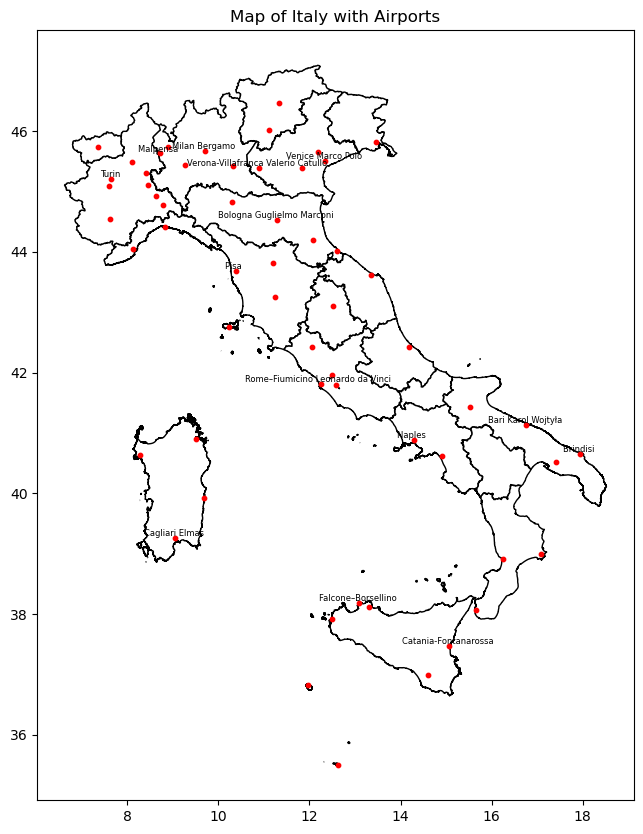

In [11]:
import matplotlib.pyplot as plt

# Plot the map of Italy
fig, ax = plt.subplots(figsize=(10, 10))


# Plot Italy boundaries
italy.plot(ax=ax, color="white", edgecolor="black")

# Plot airports with label on top of the points
airports_gdf.plot(ax=ax, color="red", markersize=10)

# Add airport names as labels
for x, y, name in zip(airports_gdf.geometry.x, airports_gdf.geometry.y, airports_gdf["name"]):
    # Only if the airport is big, plot the name on top of the point to avoid overlapping of labels
    if airports_gdf[airports_gdf["name"] == name]["type"].values[0] == "large_airport":
        ax.text(x, y, name.replace('Airport', '').replace('International', ''), fontsize=6, ha="center", va="bottom", color="black")

# Set plot title
ax.set_title("Map of Italy with Airports")

# Show the plot
plt.show()


Each airport has a unique ICAO code, which is a four-letter code used to identify airports all around the world.
This is the list of the Italian airports ICAOs that we will analyze:

In [ ]:
airports_ids = airports_gdf['ident'].unique()
airports_ids

Using this ICAOs, we can explore the data from OpenSky Network, in the database flights_data4, which contains information about flights from 2019 to 2022.

# Extracting data from OpenSky Network

<mark style="background-color: lightblue"><strong> This section wont work unless you have requested and obtained access to the OpenSkyNetwork database </strong></mark>

In [ ]:
from pyopensky import OpenskyImpalaWrapper

opensky = OpenskyImpalaWrapper()

* Server connection successful!


In [ ]:
#search for airplaines that did one of the routes above in the last year

start_day = 1641043200 # 01/01/2022
end_day = 1672540799 # 31/12/2022
list_of_dataframes = []

for id_1 in airports_ids:
    for id_2 in airports_ids:
        if id_1 != id_2:
            list_of_dataframes.append(opensky.rawquery(f"SELECT * FROM flights_data4 WHERE (estdepartureairport='{id_1}' AND estarrivalairport='{id_2}') AND (day BETWEEN {start_day} AND {end_day});"))

* Fetching records...
Sending query request: [SELECT * FROM flights_data4 WHERE (estdepartureairport='LIRF' AND estarrivalairport='LIMC') AND (day BETWEEN 1641043200 AND 1672540799);]
Processing query result.
* Records downloaded.
* Fetching records...
Sending query request: [SELECT * FROM flights_data4 WHERE (estdepartureairport='LIRF' AND estarrivalairport='LIPZ') AND (day BETWEEN 1641043200 AND 1672540799);]
Processing query result.
* Records downloaded.
* Fetching records...
Sending query request: [SELECT * FROM flights_data4 WHERE (estdepartureairport='LIRF' AND estarrivalairport='LIML') AND (day BETWEEN 1641043200 AND 1672540799);]
Processing query result.
* Records downloaded.
* Fetching records...
Sending query request: [SELECT * FROM flights_data4 WHERE (estdepartureairport='LIRF' AND estarrivalairport='LIRA') AND (day BETWEEN 1641043200 AND 1672540799);]
Processing query result.
* Records downloaded.
* Fetching records...
Sending query request: [SELECT * FROM flights_data4 WH

Save routes data from OpenSky Network to a csv file to avoid having to query the database every time we need to access the data.

In [ ]:
routes_df = pd.concat(list_of_dataframes)
routes_df.to_csv('data/routes.csv')

Is important to note that the data we have extracted from OpenSky Network is not complete, as it only contains information about flights that were tracked by the network. Furthermore, the departure airports and arrival airports are estimated by the network, and therefore may not be accurate.

However, we can still use this data as what really matters to us is the distance flown by the aircrafts, and the estimated airports are based on the distance flown.  
Furthermore, it is estimated that around 50% of the greenhouse gasses emitted by aircrafts are produced during takeoff and landing, so we can assume that the emissions calculated using this data will be a good approximation of the real emissions.

In [64]:
routes_df = pd.read_csv('data/routes.csv', header=0, sep=',', skiprows=[1])
len(routes_df)

87292

In [65]:
routes_df.head()

,Unnamed: 0,icao24,firstseen,estdepartureairport,lastseen,estarrivalairport,callsign,estdepartureairporthorizdistance,estdepartureairportvertdistance,estarrivalairporthorizdistance,estarrivalairportvertdistance,departureairportcandidatescount,arrivalairportcandidatescount,day
0,1,04004c,1649389938,LIRF,1649393154,LIMC,ETH712,762,26,404,70,0,4,1649376000
1,2,040032,1658202060,LIRF,1658205250,LIMC,ETH712,802,3,438,89,0,4,1658188800
2,3,04002f,1656907357,LIRF,1656910438,LIMC,ETH712,1670,11,414,51,0,4,1656892800
3,4,5001e5,1671447540,LIRF,1671450368,LIMC,MEA235,504,57,701,180,0,4,1671408000
4,5,4ca8fa,1669223410,LIRF,1669226783,LIMC,NOS247,811,117,934,40,0,4,1669161600


We need to filter the data to only keep the flights that are relevant to our analysis, i.e. flights that are operated by private jets.
To do so, we will cross-reference data from 2 dataset made available by OpenSky Network: aircraftDatabase.csv and doc8643AircraftTypes.csv. 

In [66]:
aircrafts_df = pd.read_csv('data/openskynetwork/aircraftDatabase.csv', header=0, sep=',', skiprows=[1])
aircrafts_df.head()

,icao24,registration,manufacturericao,manufacturername,model,typecode,serialnumber,linenumber,icaoaircrafttype,operator,...,status,built,firstflightdate,seatconfiguration,engines,modes,adsb,acars,notes,categoryDescription
0,aa3487,N757F,RAYTHEON,Raytheon Aircraft Company,A36,BE36,E-3121,NaN,L1P,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
1,a4fa61,N42MH,PIPER,Piper,PA-31-350,PA31,31-7852015,NaN,L2P,NaN,...,NaN,1977-01-01,NaN,NaN,LYCOMING TI0-540 SER,False,False,False,NaN,NaN
2,a7a809,N5926K,ROCKWELL,NaN,NaN,AC90,NaN,NaN,L2T,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
3,391927,F-GGJH,ROBIN,Robin,DR.400 160 Chevalier,DR40,1795,NaN,L1P,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
4,503c21,LY-KNA,NaN,Impulse Aircraft,Impulse 100,ZZZZ,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN


The only way i found to know if an aircraft is a private jet is to filter only 'L2J' aircrafts, which according to [skybrary](https://skybrary.aero/articles/aircraft-description-icao-doc-8643) means Landplanes, 2 engines, Jet propulsion.  

Then, to exclude airliners, we will use 'WTC' (Wake Turbulence Category) to filter out aircrafts that are too big to be private jets. [skybrary](https://skybrary.aero/articles/icao-wake-turbulence-category).  

In [67]:
aircraft_types = pd.read_csv('data/openskynetwork/doc8643AircraftTypes.csv', header=0, sep=',', skiprows=[1])

#Keep only rows where the 'Description' column is L2J and 'WTC' column is M
aircraft_types = aircraft_types[(aircraft_types['Description'] == 'L2J') & (aircraft_types['WTC'] == 'M')]

aircraft_types

,AircraftDescription,Description,Designator,EngineCount,EngineType,ManufacturerCode,ModelFullName,WTC
61,LandPlane,L2J,TOR,2,Jet,AERITALIA,Tornado,M
80,LandPlane,L2J,M346,2,Jet,AERMACCHI,M-346 Master,M
81,LandPlane,L2J,M346,2,Jet,AERMACCHI,T-346 Master,M
82,LandPlane,L2J,M346,2,Jet,AERMACCHI,Master,M
138,LandPlane,L2J,JCOM,2,Jet,AERO COMMANDER,1121 Jet Commander,M
...,...,...,...,...,...,...,...,...
9864,LandPlane,L2J,JH7,2,Jet,XIAN,Flying Leopard,M
9865,LandPlane,L2J,TU16,2,Jet,XIAN,H-6,M
9866,LandPlane,L2J,JH7,2,Jet,XIAN,JH-7,M
9891,LandPlane,L2J,YK28,2,Jet,YAKOVLEV,Yak-28,M


Now, we merge the routes data with the aircrafts data to obtain the aircraft model name and manifacturer for each flight.

In [68]:
# Merge routes_df with aircrafts_df on the 'icao24' column
routes_df = routes_df.merge(aircrafts_df[['icao24', 'model', 'manufacturername']], on='icao24')
len(routes_df)

86591

Even if openskynetwork's data are not complete, we do not found any correspondece with only 87292 - 86591 = 701 flights, which corresponds to less than 1% of the total flights in our dataset. 
Therefore, we can assume that the analysis we will perform on the filtered dataset will be a good approximation of the reality

In [69]:
routes_df.head()

Now, we will merge the resulting dataset with aircraft_types data to exclude all the flights that are not operated by private jets.

In [70]:
#merge routes_df with aircraft_types on the ModelFullName column of aircraft_types and the model column of routes_df
routes_df = routes_df.merge(aircraft_types[['ModelFullName']], left_on='model', right_on='ModelFullName')

1805

In [74]:
routes_df['ModelFullName'].unique()

array(['Legacy 600', 'Citation Excel', 'Challenger 300', 'Legacy 650',
       'Challenger 350', 'Falcon 2000', '737 MAX 8', 'Citation Latitude',
       '737-800', 'Citation XLS', 'Global 5000', 'Phenom 300',
       'EMB-135BJ Legacy 650', 'PC-24', 'Citation Sovereign',
       'EMB-505 Phenom 300', 'Global 6000', 'Lineage 1000',
       'Global Express', '680A Citation Latitude', 'Hawker 750',
       '650 Citation 7', 'Citation CJ4', '560XL Citation Excel', 'A-320',
       'ERJ-145LR'], dtype=object)

Empirically searching the models, we found that the following models are not private jets, so we remove them from the dataset:


In [77]:
to_remove = ['737 MAX 8', '737-800', 'A-320', ]
routes_df = routes_df[~routes_df['ModelFullName'].isin(to_remove)]
len(routes_df)

1198

In [79]:
routes_df.to_csv('data/italian_flights2022.csv')